# Exploratory Data Analysis

The purpose of this notebook will be exploring the dataset.

In [1]:
import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import psycopg2
import seaborn as sns

## Loading in the Data

The dataset is being continually updated with new games and thus I do a fresh pull every time.

In [2]:
# connecting to AWS PSQL instance
aws_psql_conn = psycopg2.connect(
    database=os.getenv("AWS_PSQL_DB"),
    user=os.getenv("AWS_PSQL_USER"),
    password=os.getenv("AWS_PSQL_PASSWORD"),
    host=os.getenv("AWS_PSQL_HOST"),
    port=os.getenv("AWS_PSQL_PORT"),
)

cursor = aws_psql_conn.cursor()

In [3]:
sql = f"select * from games"

cursor.execute(sql)

In [4]:
rows = cursor.fetchall()

column_names = [desc[0] for desc in cursor.description]

In [5]:
df = pl.DataFrame(rows, column_names)

In [6]:
df.describe()

statistic,game_id,home_team_id,home_team_name,away_team_id,away_team_name,home_pitcher,home_pitcher_id,home_pitcher_era,home_pitcher_win_percentage,home_pitcher_wins,home_pitcher_losses,home_pitcher_innings_pitched,away_pitcher,away_pitcher_id,away_pitcher_era,away_pitcher_win_percentage,away_pitcher_wins,away_pitcher_losses,away_pitcher_innings_pitched,winning_team,home_pitcher_k_nine,home_pitcher_bb_nine,home_pitcher_k_bb_diff,home_pitcher_whip,home_pitcher_babip,away_pitcher_k_nine,away_pitcher_bb_nine,away_pitcher_k_bb_diff,away_pitcher_whip,away_pitcher_babip,predicted_winner
str,f64,f64,str,f64,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2129.0,2129.0,"""2129""",2129.0,"""2129""","""2129""",2060.0,1971.0,1842.0,1971.0,1971.0,1971.0,"""2129""",2077.0,1991.0,1875.0,1991.0,1991.0,1991.0,2129.0,1971.0,1971.0,1971.0,1971.0,1971.0,1991.0,1991.0,1991.0,1991.0,1991.0,1343.0
"""null_count""",0.0,0.0,"""0""",0.0,"""0""","""0""",69.0,158.0,287.0,158.0,158.0,158.0,"""0""",52.0,138.0,254.0,138.0,138.0,138.0,0.0,158.0,158.0,158.0,158.0,158.0,138.0,138.0,138.0,138.0,138.0,786.0
"""mean""",718178.655707,128.743542,null,128.609676,null,null,619798.540291,4.41173,0.51419,3.955353,3.533232,65.063267,null,621884.488686,4.372757,0.508063,3.974887,3.545455,65.713661,129.108032,8.3669,3.132689,0.140466,1.328453,0.294437,8.510879,3.110583,0.143794,1.318317,0.294922,0.611318
"""std""",4314.286418,14.274003,null,14.311332,null,null,65775.247449,2.380164,0.269456,3.512131,2.980186,47.699326,null,64223.421364,2.05721,0.268514,3.524127,2.918459,47.115964,14.460946,2.364512,1.409789,0.076859,0.407917,0.058611,2.279036,1.398655,0.0724,0.335399,0.056486,0.487632
"""min""",716352.0,108.0,"""Arizona Diamon…",108.0,"""Arizona Diamon…","""""",425794.0,0.0,0.0,0.0,0.0,0.6,"""""",425794.0,0.0,0.0,0.0,0.0,0.6,108.0,0.0,0.0,-0.176471,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0
"""25%""",716977.0,115.0,null,115.0,null,null,592791.0,3.25,0.333,1.0,1.0,25.0,null,592866.0,3.26,0.333,1.0,1.0,25.6,115.0,6.98,2.27,0.095238,1.12,0.267442,7.15,2.28,0.1,1.13,0.267123,0.0
"""50%""",717622.0,134.0,null,133.0,null,null,650644.0,4.05,0.5,3.0,3.0,56.3,null,656288.0,4.06,0.5,3.0,3.0,57.6,134.0,8.4,2.91,0.145631,1.26,0.294118,8.55,2.92,0.147157,1.27,0.293279,1.0
"""75%""",718217.0,141.0,null,141.0,null,null,669022.0,5.12,0.667,6.0,5.0,97.0,null,669203.0,5.05,0.667,6.0,5.0,98.6,141.0,9.78,3.72,0.186544,1.45,0.321526,9.82,3.68,0.188889,1.45,0.321739,1.0
"""max""",748585.0,158.0,"""Washington Nat…",158.0,"""Washington Nat…","""Zack Wheeler""",700363.0,54.0,1.0,20.0,17.0,210.0,"""Zack Wheeler""",700363.0,30.86,1.0,20.0,16.0,210.0,158.0,21.6,12.6,0.578947,8.0,0.75,18.69,17.55,0.444444,4.0,0.777778,1.0


In [7]:
len(df)

2129

In [8]:
df.head(10)

game_id,home_team_id,home_team_name,away_team_id,away_team_name,home_pitcher,home_pitcher_id,home_pitcher_era,home_pitcher_win_percentage,home_pitcher_wins,home_pitcher_losses,home_pitcher_innings_pitched,away_pitcher,away_pitcher_id,away_pitcher_era,away_pitcher_win_percentage,away_pitcher_wins,away_pitcher_losses,away_pitcher_innings_pitched,winning_team,home_pitcher_k_nine,home_pitcher_bb_nine,home_pitcher_k_bb_diff,home_pitcher_whip,home_pitcher_babip,away_pitcher_k_nine,away_pitcher_bb_nine,away_pitcher_k_bb_diff,away_pitcher_whip,away_pitcher_babip,predicted_winner
i64,i64,str,i64,str,str,i64,f64,f64,i64,i64,f64,str,i64,f64,f64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64
718698,158,"""Milwaukee Brew…",121,"""New York Mets""","""Corbin Burnes""",669203,7.2,0.0,0,1,5.0,"""David Peterson…",656849,1.8,0.0,0,1,5.0,158,5.4,5.4,0.0,1.4,0.25,9.0,1.8,0.181818,1.8,0.466667,1
718781,147,"""New York Yanke…",137,"""San Francisco …","""Gerrit Cole""",543037,null,null,null,null,null,"""Logan Webb""",657277,null,null,null,null,null,147,null,null,null,null,null,null,null,null,null,null,null
718782,111,"""Boston Red Sox…",110,"""Baltimore Orio…","""Corey Kluber""",446372,null,null,null,null,null,"""Kyle Gibson""",502043,null,null,null,null,null,110,null,null,null,null,null,null,null,null,null,null,null
718777,112,"""Chicago Cubs""",158,"""Milwaukee Brew…","""Marcus Stroman…",573186,null,null,null,null,null,"""Corbin Burnes""",669203,null,null,null,null,null,112,null,null,null,null,null,null,null,null,null,null,null
718776,139,"""Tampa Bay Rays…",116,"""Detroit Tigers…","""Shane McClanah…",663556,null,null,null,null,null,"""Eduardo Rodrig…",593958,null,null,null,null,null,139,null,null,null,null,null,null,null,null,null,null,null
718779,140,"""Texas Rangers""",143,"""Philadelphia P…","""Jacob deGrom""",594798,null,null,null,null,null,"""Aaron Nola""",605400,null,null,null,null,null,140,null,null,null,null,null,null,null,null,null,null,null
718773,113,"""Cincinnati Red…",134,"""Pittsburgh Pir…","""Hunter Greene""",668881,null,null,null,null,null,"""Mitch Keller""",656605,null,null,null,null,null,134,null,null,null,null,null,null,null,null,null,null,null
718772,138,"""St. Louis Card…",141,"""Toronto Blue J…","""Miles Mikolas""",571945,null,null,null,null,null,"""Alek Manoah""",666201,null,null,null,null,null,141,null,null,null,null,null,null,null,null,null,null,null
718775,118,"""Kansas City Ro…",142,"""Minnesota Twin…","""Zack Greinke""",425844,null,null,null,null,null,"""Pablo Lopez""",641154,null,null,null,null,null,142,null,null,null,null,null,null,null,null,null,null,null


Certain columns are not needed. I am going to drop those:

In [9]:
columns_to_remove = [
    "home_team_name",
    "away_team_name",
    "home_pitcher",
    "home_pitcher_id",
    "away_pitcher",
    "away_pitcher_id",
    "predicted_winner",
]

In [10]:
df = df.drop(columns_to_remove)

In [11]:
df.head(10)

game_id,home_team_id,away_team_id,home_pitcher_era,home_pitcher_win_percentage,home_pitcher_wins,home_pitcher_losses,home_pitcher_innings_pitched,away_pitcher_era,away_pitcher_win_percentage,away_pitcher_wins,away_pitcher_losses,away_pitcher_innings_pitched,winning_team,home_pitcher_k_nine,home_pitcher_bb_nine,home_pitcher_k_bb_diff,home_pitcher_whip,home_pitcher_babip,away_pitcher_k_nine,away_pitcher_bb_nine,away_pitcher_k_bb_diff,away_pitcher_whip,away_pitcher_babip
i64,i64,i64,f64,f64,i64,i64,f64,f64,f64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
718698,158,121,7.2,0.0,0,1,5.0,1.8,0.0,0,1,5.0,158,5.4,5.4,0.0,1.4,0.25,9.0,1.8,0.181818,1.8,0.466667
718781,147,137,null,null,null,null,null,null,null,null,null,null,147,null,null,null,null,null,null,null,null,null,null
718782,111,110,null,null,null,null,null,null,null,null,null,null,110,null,null,null,null,null,null,null,null,null,null
718777,112,158,null,null,null,null,null,null,null,null,null,null,112,null,null,null,null,null,null,null,null,null,null
718776,139,116,null,null,null,null,null,null,null,null,null,null,139,null,null,null,null,null,null,null,null,null,null
718779,140,143,null,null,null,null,null,null,null,null,null,null,140,null,null,null,null,null,null,null,null,null,null
718773,113,134,null,null,null,null,null,null,null,null,null,null,134,null,null,null,null,null,null,null,null,null,null
718772,138,141,null,null,null,null,null,null,null,null,null,null,141,null,null,null,null,null,null,null,null,null,null
718775,118,142,null,null,null,null,null,null,null,null,null,null,142,null,null,null,null,null,null,null,null,null,null


Now I need to get rid of the null values:

In [12]:
df = df.drop_nulls()

In [13]:
len(df)

1693

In [14]:
df.head(10)

game_id,home_team_id,away_team_id,home_pitcher_era,home_pitcher_win_percentage,home_pitcher_wins,home_pitcher_losses,home_pitcher_innings_pitched,away_pitcher_era,away_pitcher_win_percentage,away_pitcher_wins,away_pitcher_losses,away_pitcher_innings_pitched,winning_team,home_pitcher_k_nine,home_pitcher_bb_nine,home_pitcher_k_bb_diff,home_pitcher_whip,home_pitcher_babip,away_pitcher_k_nine,away_pitcher_bb_nine,away_pitcher_k_bb_diff,away_pitcher_whip,away_pitcher_babip
i64,i64,i64,f64,f64,i64,i64,f64,f64,f64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
718698,158,121,7.2,0.0,0,1,5.0,1.8,0.0,0,1,5.0,158,5.4,5.4,0.0,1.4,0.25,9.0,1.8,0.181818,1.8,0.466667
718703,119,115,3.0,1.0,1,0,6.0,3.0,1.0,1,0,6.0,119,9.0,0.0,0.285714,0.67,0.285714,7.5,0.0,0.208333,0.83,0.294118
718704,120,139,6.0,0.0,0,1,3.0,0.0,1.0,1,0,6.0,139,9.0,9.0,0.0,3.33,0.5,9.0,1.5,0.227273,0.83,0.266667
718701,146,142,0.0,1.0,1,0,5.6,0.0,1.0,1,0,5.3,146,7.94,6.35,0.047619,1.06,0.166667,13.5,5.06,0.238095,0.94,0.222222
717821,116,109,5.23,0.429,3,4,53.3,5.4,0.4,2,3,61.6,109,8.94,3.71,0.134199,1.33,0.285714,5.4,3.21,0.056391,1.49,0.314721
717015,134,113,4.39,0.529,9,8,143.6,4.54,0.667,4,2,75.3,134,9.65,2.69,0.180488,1.27,0.310256,7.65,3.46,0.112179,1.26,0.259804
717559,112,114,2.62,0.8,8,2,79.0,5.61,0.333,2,4,59.3,112,7.97,2.05,0.164557,1.06,0.288991,5.16,3.03,0.05283,1.42,0.286432
716898,139,115,3.99,0.333,2,4,47.3,4.14,0.5,1,1,37.0,139,7.8,1.14,0.176768,1.23,0.319444,3.65,1.95,0.04321,1.46,0.310606
718434,113,140,6.0,0.0,0,1,6.0,3.38,0.75,3,1,21.3,113,12.0,3.0,0.26087,1.0,0.181818,8.02,2.95,0.12766,1.55,0.34375


In [15]:
df.describe()

statistic,game_id,home_team_id,away_team_id,home_pitcher_era,home_pitcher_win_percentage,home_pitcher_wins,home_pitcher_losses,home_pitcher_innings_pitched,away_pitcher_era,away_pitcher_win_percentage,away_pitcher_wins,away_pitcher_losses,away_pitcher_innings_pitched,winning_team,home_pitcher_k_nine,home_pitcher_bb_nine,home_pitcher_k_bb_diff,home_pitcher_whip,home_pitcher_babip,away_pitcher_k_nine,away_pitcher_bb_nine,away_pitcher_k_bb_diff,away_pitcher_whip,away_pitcher_babip
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",718216.236267,128.687537,128.841701,4.273969,0.51606,4.310691,3.833432,70.351979,4.293644,0.507327,4.291199,3.798582,70.326757,129.206143,8.485334,3.026013,0.145622,1.290532,0.293022,8.59339,3.056556,0.147278,1.295877,0.293713
"""std""",4766.613439,14.277346,14.366068,1.805981,0.264575,3.478962,2.930139,46.696537,1.841474,0.265959,3.513856,2.86211,46.193879,14.489971,1.985533,1.203523,0.064513,0.278588,0.048463,2.023977,1.304083,0.065224,0.279132,0.05092
"""min""",716352.0,108.0,108.0,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,2.0,108.0,0.0,0.0,-0.176471,0.17,0.0,0.0,0.0,-0.2,0.23,0.034483
"""25%""",716908.0,115.0,115.0,3.27,0.364,1.0,1.0,31.3,3.28,0.333,1.0,2.0,32.0,115.0,7.17,2.27,0.100548,1.12,0.26875,7.27,2.3,0.102041,1.13,0.268456
"""50%""",717516.0,134.0,134.0,4.02,0.5,3.0,3.0,62.3,4.03,0.5,3.0,3.0,63.0,134.0,8.44,2.88,0.147982,1.25,0.293413,8.57,2.91,0.147982,1.26,0.292835
"""75%""",718090.0,141.0,141.0,4.97,0.667,7.0,6.0,101.3,4.95,0.667,7.0,6.0,102.3,142.0,9.75,3.63,0.187335,1.43,0.318182,9.81,3.62,0.189723,1.43,0.318182
"""max""",748585.0,158.0,158.0,23.63,1.0,20.0,17.0,210.0,30.86,1.0,20.0,16.0,210.0,158.0,18.0,12.6,0.578947,3.8,0.545455,18.69,17.55,0.380952,4.0,0.777778


## Adding Features

There is one feature I would like to add that is not already in the dataset:

 - Strikeout-to-Walk Ratio
   - $$ \frac{\textrm{K/9}}{\textrm{BB/9}}

In [16]:
df = df.with_columns(
    pl.when((pl.col("home_pitcher_bb_nine") == 0))
    .then((None))
    .otherwise(pl.col("home_pitcher_k_nine") / pl.col("home_pitcher_bb_nine"))
    .alias("home_pitcher_k_bb_ratio")
)

In [17]:
df = df.with_columns(
    pl.when((pl.col("away_pitcher_bb_nine") == 0))
    .then((None))
    .otherwise(pl.col("away_pitcher_k_nine") / pl.col("away_pitcher_bb_nine"))
    .alias("away_pitcher_k_bb_ratio")
)

In [18]:
df["home_pitcher_k_bb_ratio"].head(10)

home_pitcher_k_bb_ratio
f64
1.0
null
1.0
1.250394
2.409704
3.587361
3.887805
6.842105
4.0


Looks like some more null values have 

In [19]:
df = df.drop_nulls()

In [20]:
df["home_pitcher_k_bb_ratio"].head(10)

home_pitcher_k_bb_ratio
f64
1.0
1.0
1.250394
2.409704
3.587361
3.887805
6.842105
4.0
2.993902


## Creating Comparisons

For the model to work there needs to be a comparison between the home team and the away team starting pitcher. I will create these fields now.

In [21]:
comps = []
winners = []

for row in df.rows(named=True):
    pitcher_era_comp = row["away_pitcher_era"] - row["home_pitcher_era"]
    pitcher_win_percentage_comp = (
        row["away_pitcher_win_percentage"] - row["home_pitcher_win_percentage"]
    )
    pitcher_win_comp = row["away_pitcher_wins"] - row["home_pitcher_wins"]
    pitcher_losses_comp = row["away_pitcher_losses"] - row["home_pitcher_losses"]
    pitcher_innings_pitched_comp = (
        row["away_pitcher_innings_pitched"] - row["home_pitcher_innings_pitched"]
    )
    pitcher_k_nine_comp = row["away_pitcher_k_nine"] - row["home_pitcher_k_nine"]
    pitcher_bb_nine_comp = row["away_pitcher_bb_nine"] - row["home_pitcher_bb_nine"]
    pitcher_k_bb_diff_comp = (
        row["away_pitcher_k_bb_diff"] - row["home_pitcher_k_bb_diff"]
    )
    pitcher_whip_comp = row["away_pitcher_whip"] - row["home_pitcher_whip"]
    pitcher_babip_comp = row["away_pitcher_babip"] - row["home_pitcher_babip"]
    pitcher_k_bb_ratio_comp = (
        row["away_pitcher_k_bb_ratio"] - row["home_pitcher_k_bb_ratio"]
    )
    comparison = [
        pitcher_era_comp,
        pitcher_win_percentage_comp,
        pitcher_win_comp,
        pitcher_losses_comp,
        pitcher_innings_pitched_comp,
        pitcher_k_nine_comp,
        pitcher_bb_nine_comp,
        pitcher_k_bb_diff_comp,
        pitcher_whip_comp,
        pitcher_babip_comp,
        pitcher_k_bb_ratio_comp,
    ]

    comps.append(comparison)
    winners.append(1 if row["winning_team"] == row["home_team_id"] else 0)

In [22]:
comps = np.array(comps)
winners = np.array(winners)

In [23]:
comps.shape

(1673, 11)

In [24]:
winners.shape

(1673,)

In [25]:
df = pl.DataFrame(
    {
        "pitcher_era_comp": pl.Series(comps[:, 0]),
        "pitcher_win_percentage_comp": pl.Series(comps[:, 1]),
        "pitcher_win_comp": pl.Series(comps[:, 2]),
        "pitcher_losses_comp": pl.Series(comps[:, 3]),
        "pitcher_innings_pitched_comp": pl.Series(comps[:, 4]),
        "pitcher_k_nine_comp": pl.Series(comps[:, 5]),
        "pitcher_bb_nine_comp": pl.Series(comps[:, 6]),
        "pitcher_k_bb_diff_comp": pl.Series(comps[:, 7]),
        "pitcher_whip_comp": pl.Series(comps[:, 8]),
        "pitcher_babip_comp": pl.Series(comps[:, 9]),
        "pitcher_k_bb_ratio_comp": pl.Series(comps[:, 10]),
        "winning_team": pl.Series(winners),
    }
)

## Visualizing Data

First I am going to plot the numerical features and get an idea of their distribution.

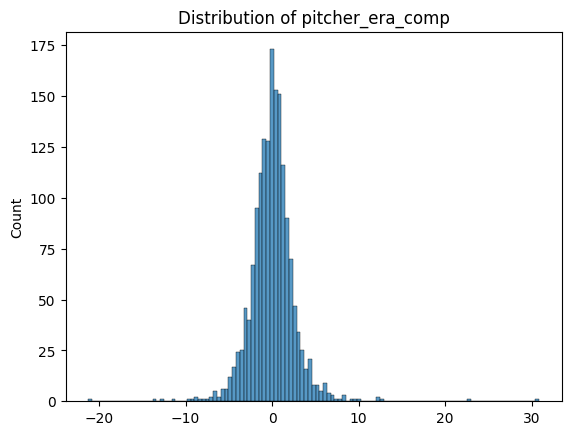

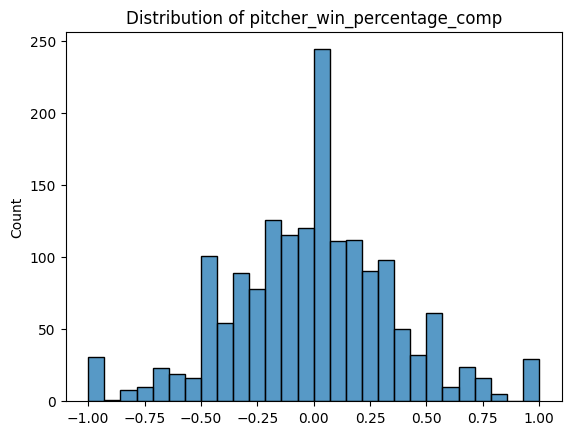

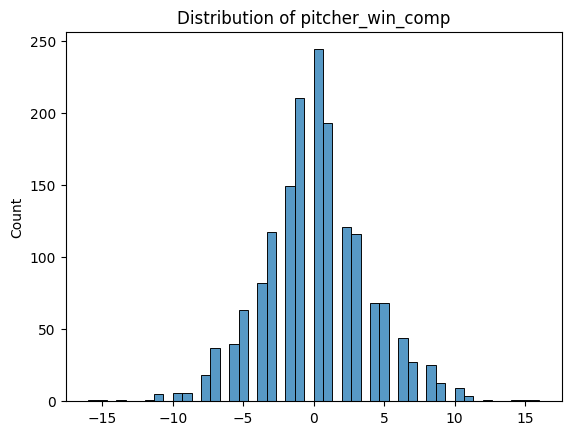

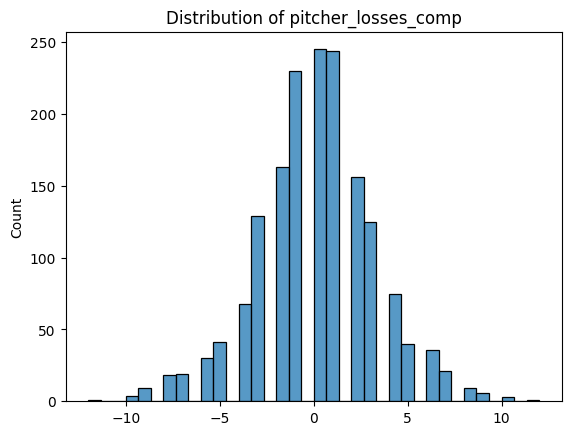

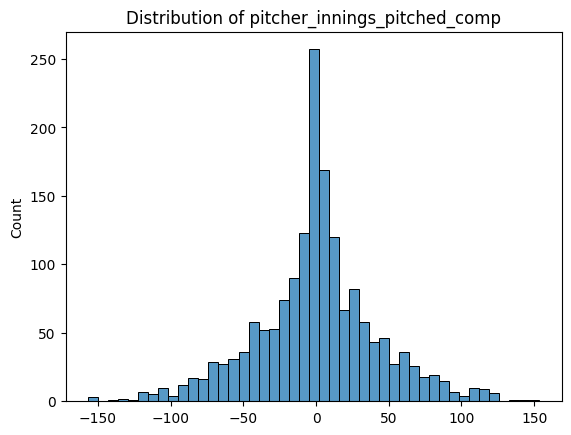

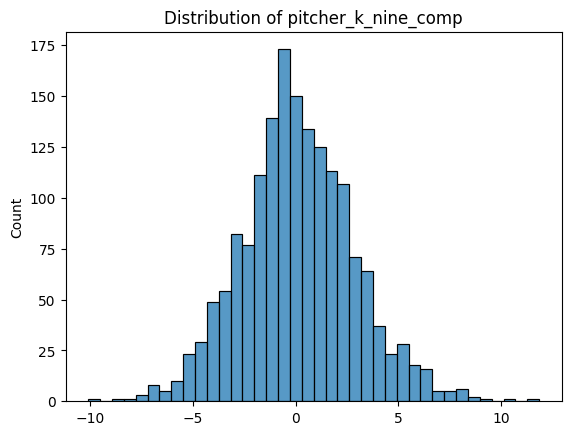

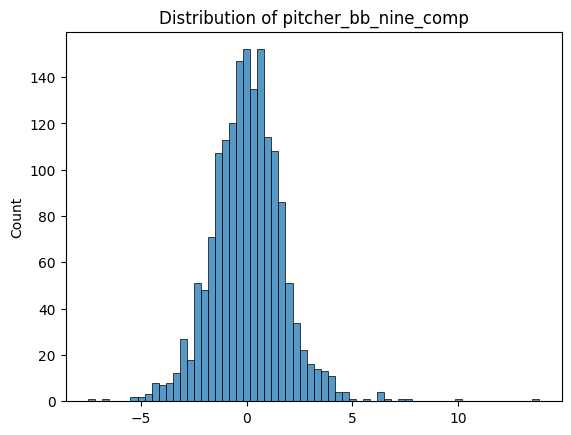

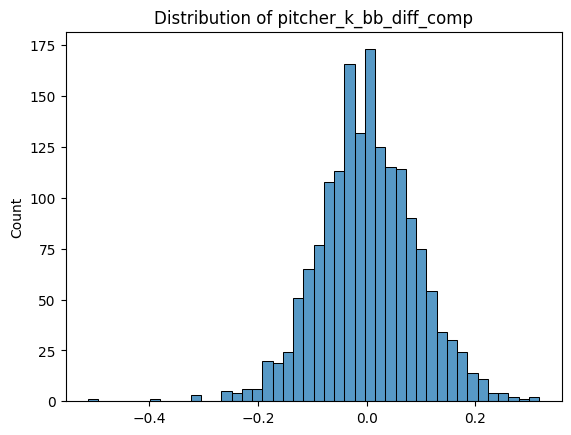

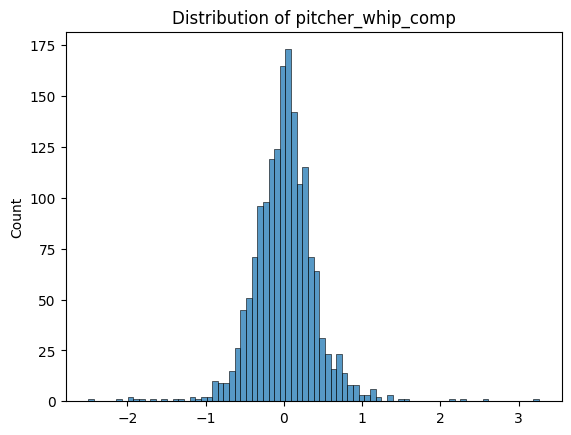

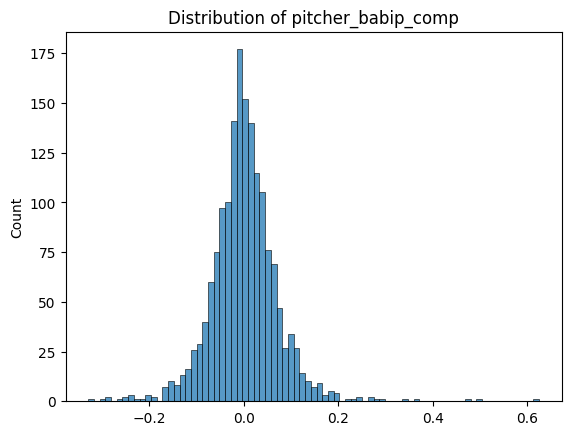

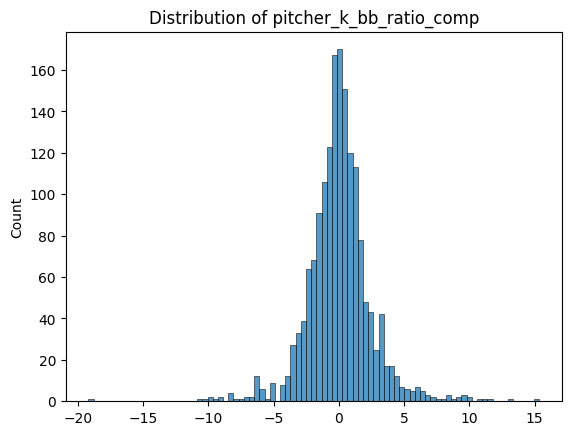

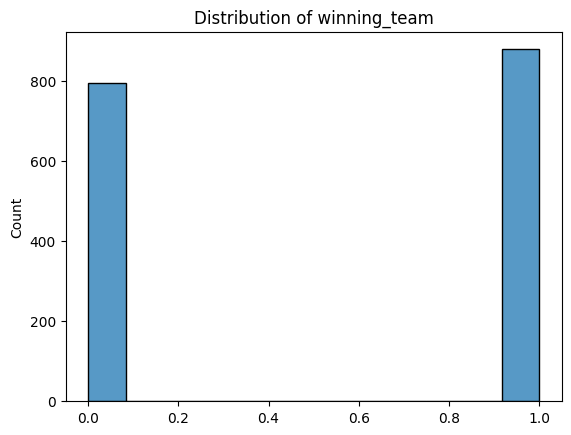

In [26]:
for col in df.columns:
    sns.histplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

Now I am going to try to make some visualizations and see if I can't get some insights into what indicates a potential winner.

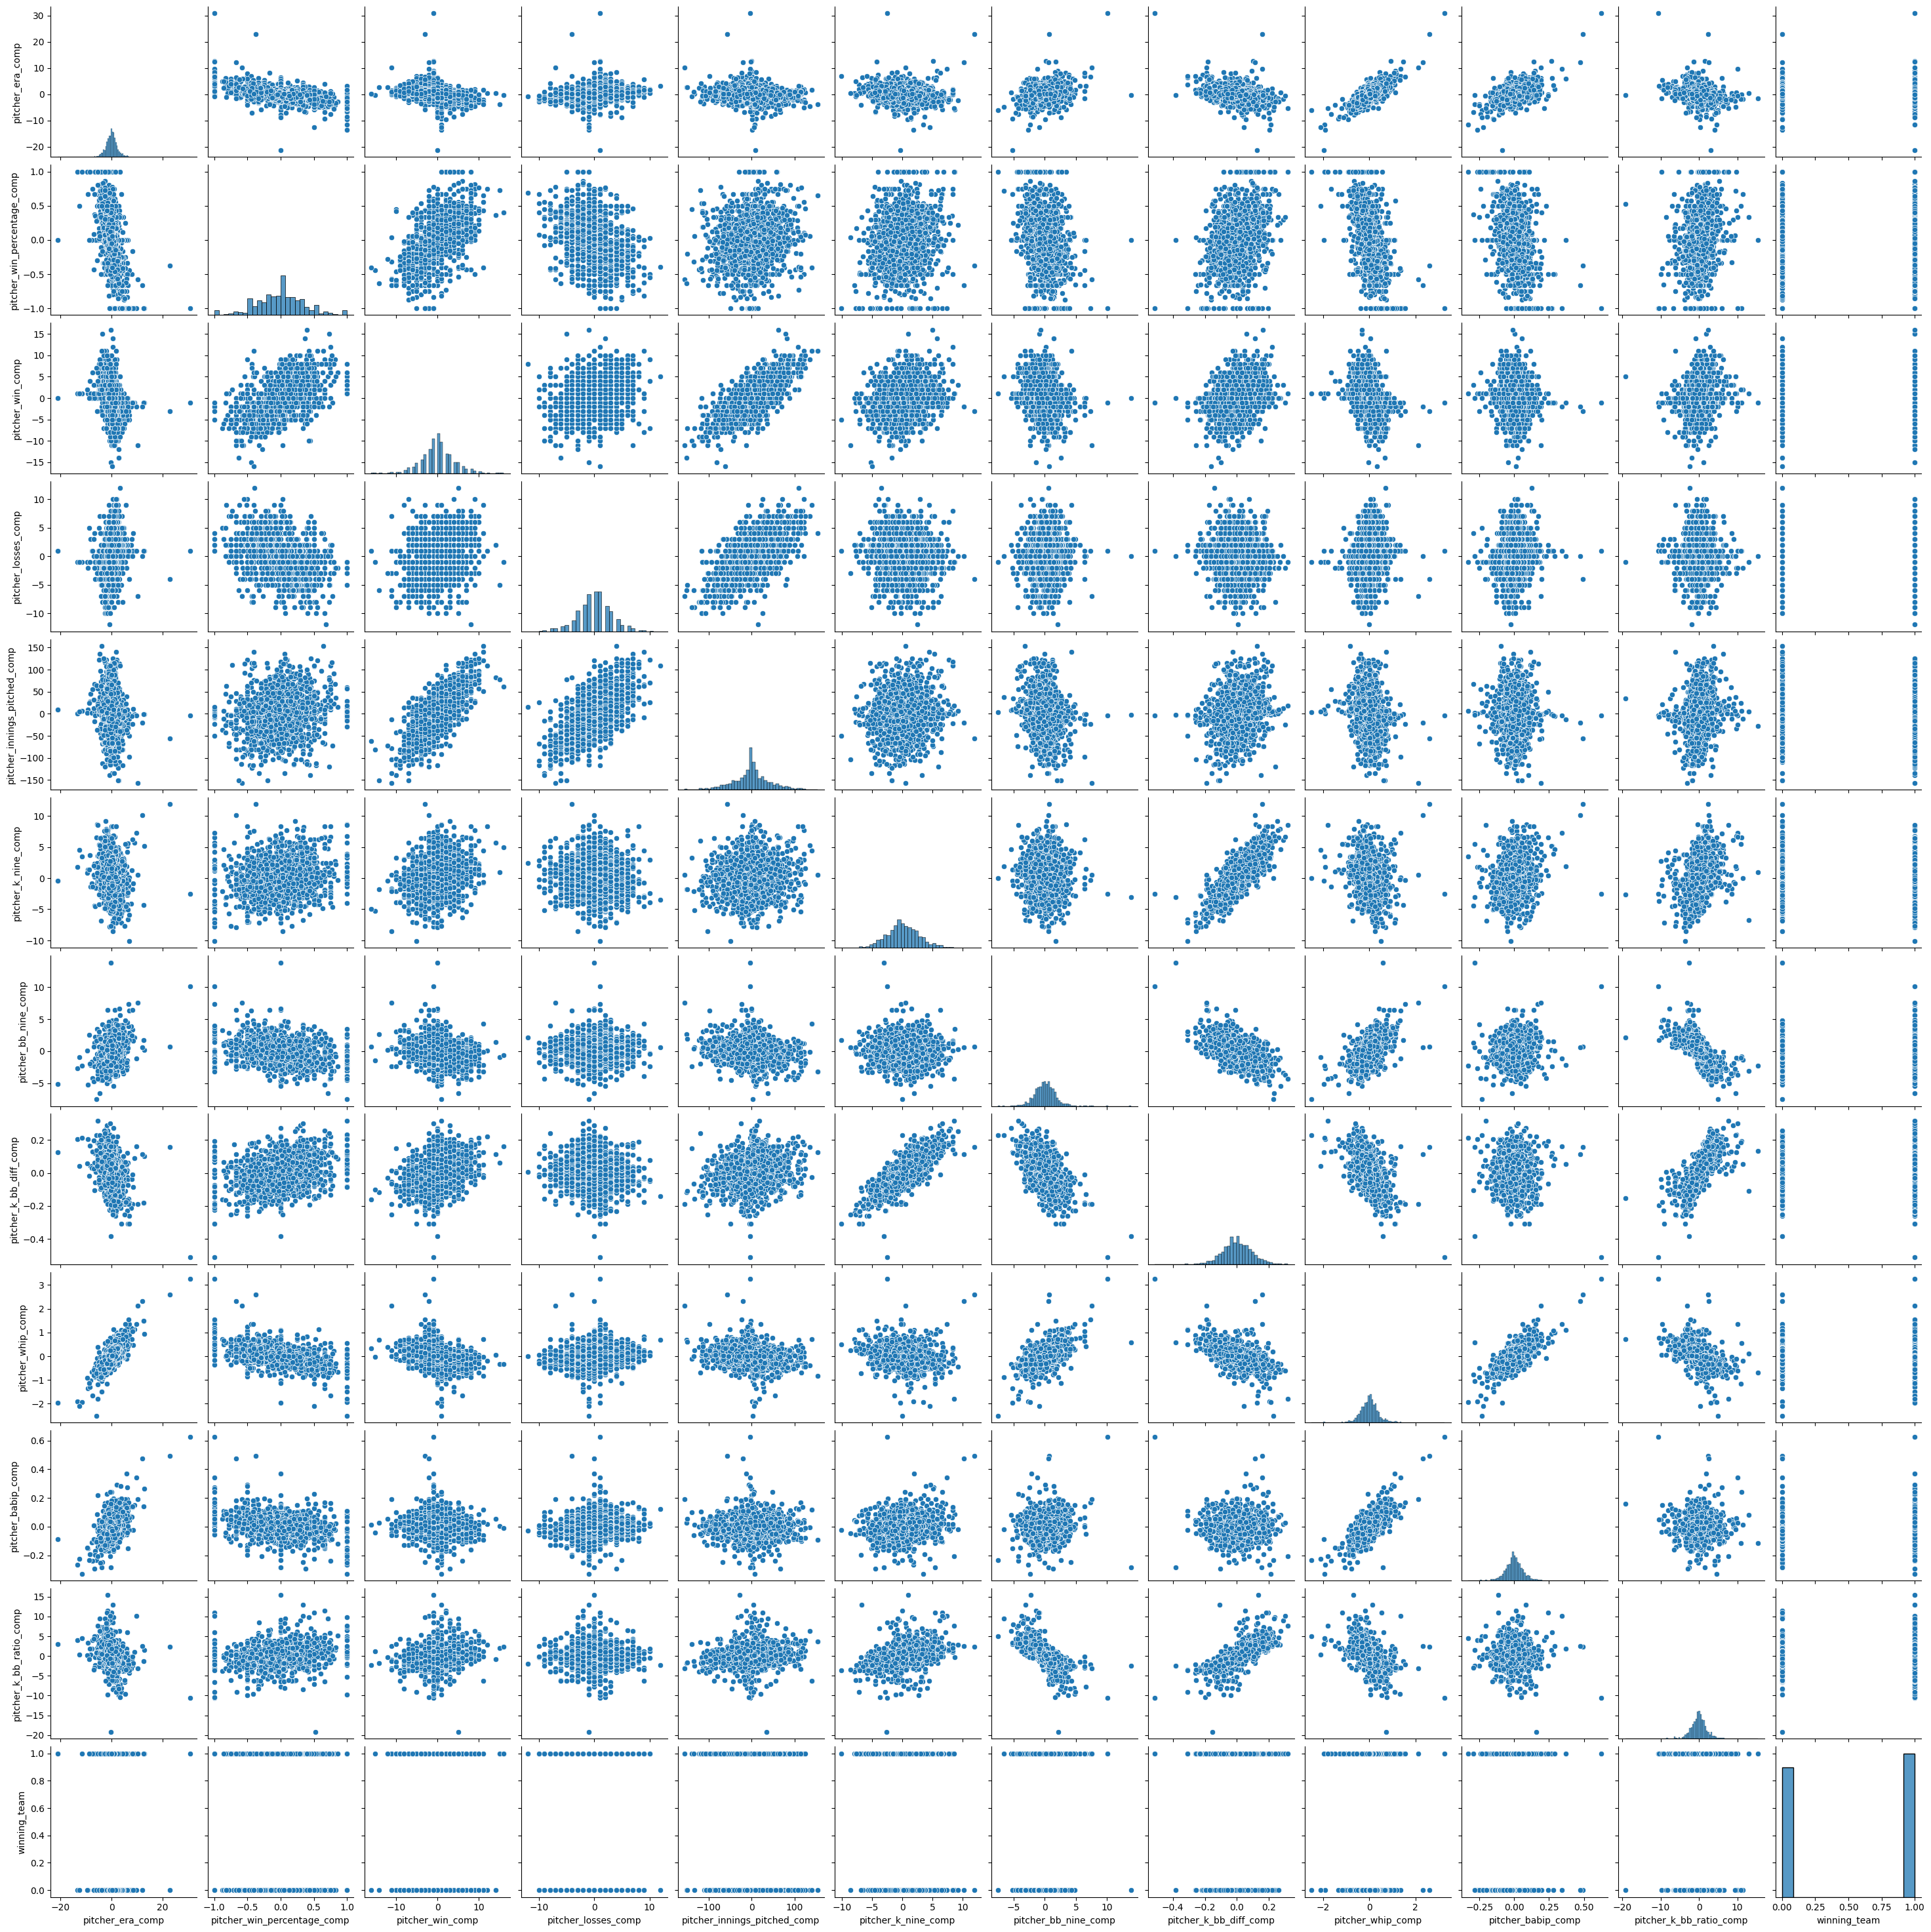

In [27]:
sns.pairplot(df.to_pandas())

Unfortunately, I don't think that there's much indication of any boundaries here. I don't think changing the dimensionality of a model is going to help either -- this seems about as random as random gets.

## Writing Out Dataset

There was not a lot to learn from this EDA exercise... the winners, with the data set I have, are seemingly pretty random. At this point, I am just going to write out to a parquet file for later modeling.

In [28]:
df.shape

(1673, 12)

In [29]:
df.describe()

statistic,pitcher_era_comp,pitcher_win_percentage_comp,pitcher_win_comp,pitcher_losses_comp,pitcher_innings_pitched_comp,pitcher_k_nine_comp,pitcher_bb_nine_comp,pitcher_k_bb_diff_comp,pitcher_whip_comp,pitcher_babip_comp,pitcher_k_bb_ratio_comp,winning_team
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0,1673.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.032959,-0.009209,-0.008966,-0.028691,0.117155,0.114071,0.036844,0.001594,0.006922,0.001019,0.024861,0.524806
"""std""",2.615378,0.36593,3.78369,3.152297,42.295013,2.749947,1.695493,0.089692,0.399619,0.07127,2.477056,0.499534
"""min""",-21.25,-1.0,-16.0,-12.0,-156.7,-10.1,-7.5,-0.512281,-2.5,-0.32906,-19.203311,0.0
"""25%""",-1.32,-0.225,-2.0,-2.0,-20.4,-1.6,-0.96,-0.054545,-0.21,-0.035528,-1.211423,0.0
"""50%""",0.04,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.01,-0.001699,-0.003115,1.0
"""75%""",1.28,0.214,2.0,2.0,21.3,1.87,1.03,0.059098,0.22,0.036996,1.149005,1.0
"""max""",30.86,1.0,16.0,12.0,153.4,11.86,13.83,0.317297,3.26,0.625,15.362171,1.0


In [30]:
current_time = str(datetime.datetime.now()).replace(" ", "_")[:19].replace(":", "-")

df.write_parquet("dataset_current.parquet")